# Question 3
# 1.Business concern



### Question 3:What were the top Australian news topics over the last decade, and what can these say about the national conversation? 

The significance of this question is that we are going to find which were the news topic australian prefer to heard and we can have insight of conversion topic which australian had in last decade.


### keystakeholder :
Australian goverment agency : to know what is talked among the australian and what are concerns related to it.

News agency: to know which topics do australian prefer to watch so that they can make strategy based on it to increase trp

Merchandise salesperson : To know what peple are having conversion about and based on that he can plan strategy to sales a particular product.

Online shopping company: based on the conversion the company can launch particular product or can revised strategy for selling of sme products.



### Interpretion of question
The question will be interpreted in following way

Data collection : data has been collected from reliable sources (abc news)

Data cleaning and processing : data will be examine with checking rows and columns if there is any missing data then it would be either removed or being added based on the structure of data.The processing would take place based of the requirement of data since for this question data is required for only of decade therefore the data from 2010 to 2019 will only we considered

Data analysis : based on the processed data data analysis will take place in this we are using stopword removal and tfidf .The stopword remover will remove the commonly used stopwords from the topics words like is for and will be removed.tfidf will be used to know the frequency of words other then the stopwords which are being used in topic from past decades .THe words would be priotize based on the tfidf value

visualisation : for visualisation i am going to use wordcloud which will display the words priotize by tfidf

# 2.Data collection 

#### importing libraries and packages 

In [83]:
import sys
!{sys.executable} -m pip install gensim
!pip install wordcloud               #for visualisation
import re                            #regex or regular expression used to remove blank space
from wordcloud import WordCloud     #for visualisation
import matplotlib.pyplot as plt     # for visualisaation
import pandas as pd
import numpy as np
from gensim.models import TfidfModel    #for tfidf
from gensim.corpora import Dictionary   #for tokens
from gensim.utils import tokenize       #for tokenising
from gensim.utils import simple_preprocess # for tokenising process
from gensim.corpora.textcorpus import remove_stopwords  #for removng stopwords
from gensim.summarization import keywords

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [84]:
#### collection of data

In [85]:
data_news=pd.read_csv("abcnews-date-text.csv")  #import dat from csv file
data_news                                       #displaying data

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1186013,20191231,vision of flames approaching corryong in victoria
1186014,20191231,wa police and government backflip on drug amne...
1186015,20191231,we have fears for their safety: victorian premier
1186016,20191231,when do the 20s start


# 3.Data cleaning and processing

#### data cleaning

In [86]:
num_rows = data_news.shape[0]                   #to find no of rows
num_cols = data_news.shape[1]                   # to find no of columns

print("The dataset has %d rows and %d columns" %(num_rows, num_cols))
for heading in data_news.columns:   # for each heading in the dataframe
    print(heading) 


The dataset has 1186018 rows and 2 columns
publish_date
headline_text


In [87]:
data_news.info()         # to know the data type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186018 entries, 0 to 1186017
Data columns (total 2 columns):
publish_date     1186018 non-null int64
headline_text    1186018 non-null object
dtypes: int64(1), object(1)
memory usage: 18.1+ MB


In [88]:
#since data type of date is integer type therefore  changing  publish date into date format
data_news['publish_date'] = pd.to_datetime(data_news['publish_date'], format='%Y%m%d')
reindexing=data_news['headline_text']


#### processing of data
since we required the data from only the past decade so we need to get data only from 2010 to 2019 therefore should have set index as data

In [89]:

#set index as publish date
data_news=data_news.set_index(data_news['publish_date'])
data_news=data_news.loc['2010-01-01':'2019-12-31']
data_news

,publish_date,headline_text
publish_date,,
2010-01-01,2010-01-01,12m degas stolen from museum
2010-01-01,2010-01-01,17 die in bangladesh bus crash
2010-01-01,2010-01-01,2010 to be drier after very wet 2009
2010-01-01,2010-01-01,37 catholic workers killed worldwide
2010-01-01,2010-01-01,600 hurt in philippine new year revelry
...,...,...
2019-12-31,2019-12-31,vision of flames approaching corryong in victoria
2019-12-31,2019-12-31,wa police and government backflip on drug amne...
2019-12-31,2019-12-31,we have fears for their safety: victorian premier


# 4.Analysis 
since we are concerned with only headline therefore making neww dataframe which consist of only headline_text

In [90]:
new=data_news['headline_text']
new
new.reset_index(drop=True,inplace=True) #removing the index which was set as date
new

0                              12m degas stolen from museum
1                            17 die in bangladesh bus crash
2                      2010 to be drier after very wet 2009
3                      37 catholic workers killed worldwide
4                   600 hurt in philippine new year revelry
                                ...                        
675708    vision of flames approaching corryong in victoria
675709    wa police and government backflip on drug amne...
675710    we have fears for their safety: victorian premier
675711                                when do the 20s start
675712    yarraville shooting woman dead man critically ...
Name: headline_text, Length: 675713, dtype: object

In [91]:
news_df=pd.DataFrame(new,columns=['headline_text'])  #making new data frame new_df
news_df

,headline_text
0,12m degas stolen from museum
1,17 die in bangladesh bus crash
2,2010 to be drier after very wet 2009
3,37 catholic workers killed worldwide
4,600 hurt in philippine new year revelry
...,...
675708,vision of flames approaching corryong in victoria
675709,wa police and government backflip on drug amne...
675710,we have fears for their safety: victorian premier
675711,when do the 20s start


#### stopword removal
for removing stpwords we are using remove_stopwords ,simple_preprocess from gimsim package .The result will be stored in processsed_headline column 

In [92]:
news_df['processed_headline']=[remove_stopwords(simple_preprocess(headline_text,min_len=3)) for headline_text in news_df['headline_text']]
news_df

,headline_text,processed_headline
0,12m degas stolen from museum,"[degas, stolen, museum]"
1,17 die in bangladesh bus crash,"[die, bangladesh, bus, crash]"
2,2010 to be drier after very wet 2009,"[drier, wet]"
3,37 catholic workers killed worldwide,"[catholic, workers, killed, worldwide]"
4,600 hurt in philippine new year revelry,"[hurt, philippine, new, year, revelry]"
...,...,...
675708,vision of flames approaching corryong in victoria,"[vision, flames, approaching, corryong, victoria]"
675709,wa police and government backflip on drug amne...,"[police, government, backflip, drug, amnesty, ..."
675710,we have fears for their safety: victorian premier,"[fears, safety, victorian, premier]"
675711,when do the 20s start,[start]


#### tfidf 
for tfidf we are giving token to words with use of dictionary
Then we are  using corpus for doing tfidf modeling 
the words will be sorted depending on the terms value from tfidf

In [93]:
vocab=Dictionary(news_df['processed_headline'])  #dictionary
print(vocab.token2id)

{'degas': 0, 'museum': 1, 'stolen': 2, 'bangladesh': 3, 'bus': 4, 'crash': 5, 'die': 6, 'drier': 7, 'wet': 8, 'catholic': 9, 'killed': 10, 'workers': 11, 'worldwide': 12, 'hurt': 13, 'new': 14, 'philippine': 15, 'revelry': 16, 'year': 17, 'abbott': 18, 'asylum': 19, 'seekers': 20, 'turn': 21, 'vows': 22, 'accused': 23, 'bail': 24, 'break': 25, 'deakin': 26, 'refused': 27, 'agforce': 28, 'barrier': 29, 'great': 30, 'opposes': 31, 'reef': 32, 'run': 33, 'airport': 34, 'bare': 35, 'security': 36, 'stripped': 37, 'alcohol': 38, 'emergency': 39, 'flood': 40, 'injuries': 41, 'qld': 42, 'related': 43, 'wards': 44, 'belgian': 45, 'comeback': 46, 'eyes': 47, 'queens': 48, 'anger': 49, 'centrelink': 50, 'fast': 51, 'repayments': 52, 'tracks': 53, 'boat': 54, 'intercepted': 55, 'seeker': 56, 'arsenal': 57, 'diaby': 58, 'gun': 59, 'signs': 60, 'young': 61, 'art': 62, 'boost': 63, 'economy': 64, 'exhibit': 65, 'local': 66, 'set': 67, 'australia': 68, 'bang': 69, 'brings': 70, 'addiction': 71, 'ago'

In [94]:
corpus = [vocab.doc2bow(words) for words in news_df['processed_headline']]
model=TfidfModel(corpus)
tfidf_doc=model[corpus[0]]
tfidf_doc


def get_tfidf(idx):                                            #to do tfidf and sort the words based on the values
    term_values=[(vocab[el[0]],el[1]) for el in model [corpus[idx]] if el[1]>0]
    srt=sorted(term_values,key=lambda x:x[1],reverse=True) #sorting of words
    return list(map(lambda x: x[0],srt[:5]))

news_df['tfidf'] =news_df.index.map(get_tfidf) #tfidf column to storer the result
news_df

,headline_text,processed_headline,tfidf
0,12m degas stolen from museum,"[degas, stolen, museum]","[degas, museum, stolen]"
1,17 die in bangladesh bus crash,"[die, bangladesh, bus, crash]","[bangladesh, die, bus, crash]"
2,2010 to be drier after very wet 2009,"[drier, wet]","[drier, wet]"
3,37 catholic workers killed worldwide,"[catholic, workers, killed, worldwide]","[worldwide, catholic, workers, killed]"
4,600 hurt in philippine new year revelry,"[hurt, philippine, new, year, revelry]","[revelry, philippine, hurt, year, new]"
...,...,...,...
675708,vision of flames approaching corryong in victoria,"[vision, flames, approaching, corryong, victoria]","[corryong, approaching, flames, vision, victoria]"
675709,wa police and government backflip on drug amne...,"[police, government, backflip, drug, amnesty, ...","[bins, backflip, amnesty, drug, government]"
675710,we have fears for their safety: victorian premier,"[fears, safety, victorian, premier]","[victorian, premier, safety, fears]"
675711,when do the 20s start,[start],[start]


# 4 visualisation

we are using re for removing space
wordcloud is used to display the cluster of wordss based on the tfidf term value 
The word which has higher priority would be displayed in bigger size
the max_words is set to 50 so that only 50 most relevant wods can be displayed 
minimum length of word is set to 5 to avoid less significant words

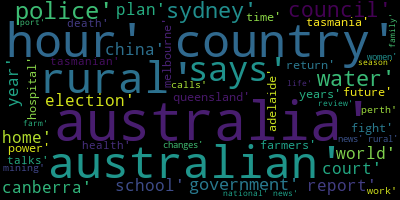

In [95]:
Topics=','.join(map(str,list(news_df['tfidf'].values)))
#create wordcloud object

wordcloud=WordCloud(max_words=50,contour_width=4,min_word_length=5,normalize_plurals=False) # set the max_words and minimum length of word
wordcloud.generate(Topics)

wordcloud.to_image()

#### national conversion

From the visualisaation we can say that the topics which were mostly talked were  australia,australian,country,police,rural country etc.from this we can say that the national coversion was mostly related to the naional issue includes goverment policy,rural crisis,water crisis ,council issue etc.

# 5 Insight
The question is addressed suitably through the analysis and visualization .we can see the top 50 topics which were a part of news watched by Australian. From these topics, we can say that Australian concern about topics related to national interest since Australia and Australian as well as country is occurring more time in headlines. With that, we can say that Australian are also interested in whats going on in the neighborhood and their safety as well as in world affairs since police and world and names of some nation are occurring in greater instances. Also many topics are concerned with rural life like rural, farmers, water, farm, etc. From this analysis stakeholders like the Australian government get an insight that the viewers and Australian are more concerned regarding the national affairs and as well as rural population issues like farming and water crisis which can help the government to plan the policy accordingly. keystakeholders like news agency and the merchandised salesman can get an insight that Australian are more concerned about a national issue and can plan their campaign accordingly. keystakeholder like online shopping companies can take insight like how Australian view the products grown in Australia and also can know sentiments of Australian which can help them to launch a new product or change their strategy.

---

# Question 1

# 1.business concern

#### Question: How does the frequency of mental health illness and attitudes towards mental health vary by geographic location, and what are the strongest predictors of mental health illness and specific attitudes towards mental health in the workplace?

This question is significant to know information of mental health illness among the working indivuals and how does it vary from location to location,we will also try to find insight of which is are the strong predicters of mental health issue and how people having such issues are treated at work places.


#### key stakeholders:
Technology and industrial company: to know how their employees in then company have such issue and how they can make them comfortable to solve it so that they can get full potential outcome from them.

Health adminstration of country:they will get insight from this regarding the state of mind of people who are wrking in tech industry and can start some program based on insight to help them


clinical psychology therapist :they will know an insight of why people are having such mental issues and by it they can make theirtheraphy to cure such patients


#### interpretation of question

Data collection : data is being collected from a survey which was there on mental health issue on kaggle.com

data cleaning and processing: data is cleaned suitably and prepcessed depedning on the requirement of the question .if there is missing data then it will be suitably handle by replacing or deleting the data depedning on the requirement of question

data analysis:Data analysis done dividing the original question in parts.The first part of question is to find frequency of people having mental issue in different geographical location for which we have extracted a new dataframe from original dataframe which consist of country and mental health consequences only.The second part of analysis is to find strong predicters for mental health issue .for which i have made a daatframe which consist of column like treatment,work interference,family history,physical health consequences,mental health consequences and then we have correlted the columns.The third part of analysis is to find attitude of people in work place regarding mental health .for this we have taken columns which are related to survey asked in work enviornment and depending on that we have made done analysis.

visualization: i have used sns package for visualization since the data is mostly non numerical data .visualization consist of bar graph and heat map depedning on the question .

# 2.Data collection

#### importing package and libraries

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize']=12,8

#### collection of data 

In [97]:
df=pd.read_csv("survey.csv")

In [98]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


# 3.data cleaning and preprocessing 

#### cleaning

In [99]:
num_rows = df.shape[0]
num_cols = df.shape[1]

print("The dataset has %d rows and %d columns" %(num_rows, num_cols))
for heading in df.columns:   # for each heading in the dataframe
    print(heading)

The dataset has 1259 rows and 27 columns
Timestamp
Age
Gender
Country
state
self_employed
family_history
treatment
work_interfere
no_employees
remote_work
tech_company
benefits
care_options
wellness_program
seek_help
anonymity
leave
mental_health_consequence
phys_health_consequence
coworkers
supervisor
mental_health_interview
phys_health_interview
mental_vs_physical
obs_consequence
comments


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [101]:
df.fillna("Not Specified", inplace = True)  #replacing the nan with not specified

In [102]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,Not Specified,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Not Specified
1,2014-08-27 11:29:37,44,M,United States,IN,Not Specified,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,Not Specified
2,2014-08-27 11:29:44,32,Male,Canada,Not Specified,Not Specified,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Not Specified
3,2014-08-27 11:29:46,31,Male,United Kingdom,Not Specified,Not Specified,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Not Specified
4,2014-08-27 11:30:22,31,Male,United States,TX,Not Specified,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Not Specified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,Not Specified,No,No,Yes,Not Specified,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,Not Specified
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,Not Specified
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,Not Specified
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,Not Specified,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,Not Specified


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        1259 non-null object
self_employed                1259 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               1259 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null o

#### preprocessing

since the data in column comments is not relevant and data in states are related to only specific countries so i have deleted both the columns.

In [104]:
df=df.drop(["comments","state"],axis=1)

In [105]:
df

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,Not Specified,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,Not Specified,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,Not Specified,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,Not Specified,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,Not Specified,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,No,No,Yes,Not Specified,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,f,United States,No,No,No,Not Specified,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


# Analysis part 1

for first part of question to find out frequency of mental health illness and attitude towards mental health illness.i have formed a 2 new dataframe using the the old dataframe .This first dataframe consists of only two columns mental health consequences and country and second dataframe consist of two columns treatment and country.

In [106]:
frequency=df.filter(["Country","mental_health_consequence"])
treated=df.filter(["Country","treatment"])

##### For knowing the frequency of mental health illness i am using pivot

In [107]:
cu = frequency.pivot_table(index=['Country', 'mental_health_consequence'], aggfunc='size')
cu

Country        mental_health_consequence
Australia      Maybe                          3
               No                            10
               Yes                            8
Austria        No                             3
Bahamas, The   Yes                            1
                                           ... 
United States  Maybe                        300
               No                           280
               Yes                          171
Uruguay        No                             1
Zimbabwe       Yes                            1
Length: 89, dtype: int64

##### For knowing how many number of people have opted for treatment i have use pivot.then i have consider only those data of those who have been treated and later counted the number of them using the pivot

In [108]:
atti = treated.pivot_table(index=["Country","treatment"], aggfunc='size')
atti
yes_atti=treated.loc[treated["treatment"]=='Yes']
yes_atti
prefectatti= yes_atti.pivot_table(index=["Country","treatment"], aggfunc='size')
prefectatti

Country         treatment
Australia       Yes           13
Bahamas, The    Yes            1
Belgium         Yes            1
Brazil          Yes            2
Bulgaria        Yes            2
Canada          Yes           37
Croatia         Yes            2
Denmark         Yes            2
Finland         Yes            1
France          Yes            2
Germany         Yes           21
India           Yes            3
Ireland         Yes           13
Italy           Yes            1
Japan           Yes            1
Mexico          Yes            1
Moldova         Yes            1
Netherlands     Yes            9
New Zealand     Yes            5
Poland          Yes            4
Singapore       Yes            1
Slovenia        Yes            1
South Africa    Yes            4
Sweden          Yes            2
Switzerland     Yes            3
United Kingdom  Yes           93
United States   Yes          410
Zimbabwe        Yes            1
dtype: int64

##### To know the frequency of those who have mental illness have selected only those data who has given answer as yes for mental health issue and calculated number of patients for respective countries

In [109]:
yes=frequency.loc[frequency["mental_health_consequence"]=='Yes']
yes
du= yes.pivot_table(index=['Country', 'mental_health_consequence'], aggfunc='size')
du

Country         mental_health_consequence
Australia       Yes                            8
Bahamas, The    Yes                            1
Belgium         Yes                            2
Bulgaria        Yes                            1
Canada          Yes                           16
Colombia        Yes                            1
Croatia         Yes                            1
Finland         Yes                            2
France          Yes                            1
Georgia         Yes                            1
Germany         Yes                            5
Greece          Yes                            2
Hungary         Yes                            1
India           Yes                            4
Ireland         Yes                           11
Israel          Yes                            1
Italy           Yes                            1
Japan           Yes                            1
Netherlands     Yes                            4
New Zealand     Yes        

##### To know the frequency of those who does not have mental illness have selected only those data who has given answer as no for mental health issue and calculated number of patients for respective countries

In [110]:

NO=frequency.loc[frequency["mental_health_consequence"]=='No']
NO
Nu= NO.pivot_table(index=['Country', 'mental_health_consequence'], aggfunc='size')
Nu

Country         mental_health_consequence
Australia       No                            10
Austria         No                             3
Brazil          No                             3
Bulgaria        No                             1
Canada          No                            31
China           No                             1
Costa Rica      No                             1
Croatia         No                             1
Czech Republic  No                             1
Denmark         No                             2
Finland         No                             1
France          No                             4
Germany         No                            28
India           No                             2
Ireland         No                             6
Israel          No                             1
Italy           No                             3
Mexico          No                             2
Moldova         No                             1
Netherlands     No         

##### To know the frequency of those who are undecided have mental illness have selected only those data who has given answer as maybe for mental health issue and calculated number of people for respective countries

In [111]:
Maybe=frequency.loc[frequency["mental_health_consequence"]=='Maybe']
Maybe
mu= Maybe.pivot_table(index=['Country', 'mental_health_consequence'], aggfunc='size')
mu

Country                 mental_health_consequence
Australia               Maybe                          3
Belgium                 Maybe                          4
Bosnia and Herzegovina  Maybe                          1
Brazil                  Maybe                          3
Bulgaria                Maybe                          2
Canada                  Maybe                         25
Colombia                Maybe                          1
France                  Maybe                          8
Germany                 Maybe                         12
India                   Maybe                          4
Ireland                 Maybe                         10
Israel                  Maybe                          3
Italy                   Maybe                          3
Latvia                  Maybe                          1
Mexico                  Maybe                          1
Netherlands             Maybe                          9
New Zealand             Maybe         

# visualisation part1

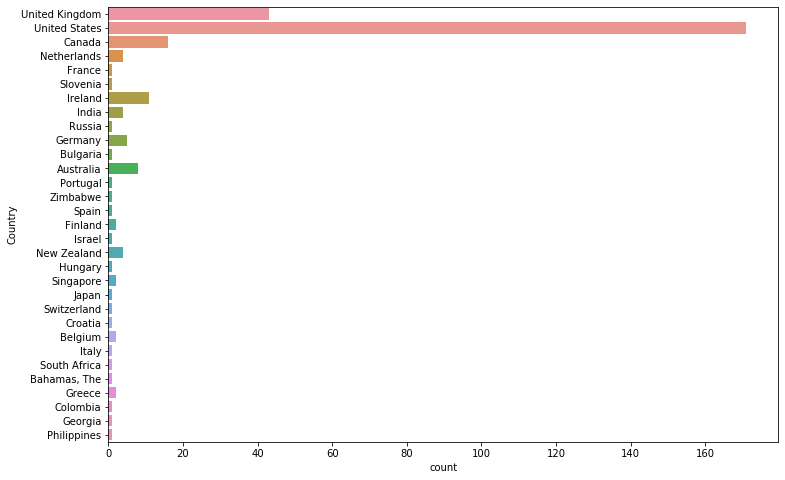

In [112]:
y=sns.countplot(y="Country",data=yes)    #visualisattion for who has opted for Yes
#l=sns.countplot(y="Country",data=NO)    #visualisation for who has opted for no
#g=sns.countplot(y="Country",data=Maybe)  #visualisation for who has opted for maybe

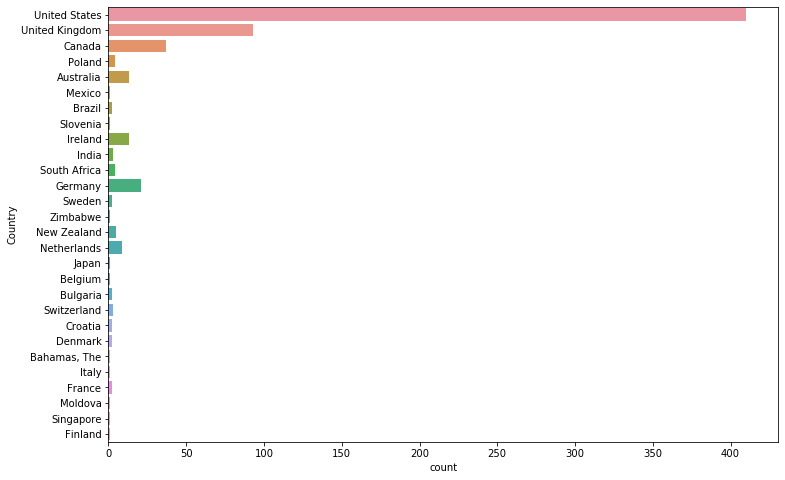

In [113]:
t=sns.countplot(y="Country",data=yes_atti) # projection of number of people been treated

# insight from part1 visualisation 
we can see  the frequency of the mental health issue in different nation we can saay from the graph that there are greater number of people having mental issue in usa ,uk , canada and etc.when we compare this data with the number of patients treated we see that the number of people treated in usa and uk are higher then frequency of mental issue ,this show that this countries have positive attitude towards mental health issue.when you see country like italy,georgia,colombia and compare both the graph for country we will see that there are less people treated then the frequency of people having mental illness.

# Analysis part 2
for this analysis to find f the strongest predicter i have made new dataframe which consist of columns like treatment,mental health consequences,physical health consequences,family history,work interfere which are related to indivual.i have then tried to find correlation between them to find strongest predicters.i have consider treatment column as to be compare with other because it is the one which  has patients who have been treated from mental issue.

In [114]:
prediction=df.filter(["family_history","mental_health_consequence","phys_health_consequence","work_interfere","treatment"])
prediction

,family_history,mental_health_consequence,phys_health_consequence,work_interfere,treatment
0,No,No,No,Often,Yes
1,No,Maybe,No,Rarely,No
2,No,No,No,Rarely,No
3,Yes,Yes,Yes,Often,Yes
4,No,No,No,Never,No
...,...,...,...,...,...
1254,No,No,No,Not Specified,Yes
1255,Yes,No,No,Often,Yes
1256,Yes,Yes,Yes,Sometimes,Yes
1257,No,Yes,No,Not Specified,No


since the data is in int type i have changed it to categorical for finding correlation

In [115]:
prediction["mental_health_consequence"]=prediction["mental_health_consequence"].astype('category').cat.codes
prediction["phys_health_consequence"]=prediction["phys_health_consequence"].astype('category').cat.codes
prediction["family_history"]=prediction["family_history"].astype('category').cat.codes
prediction["work_interfere"]=prediction["work_interfere"].astype('category').cat.codes
prediction["treatment"]=prediction["treatment"].astype("category").cat.codes
prediction.corr()

,family_history,mental_health_consequence,phys_health_consequence,work_interfere,treatment
family_history,1.000000,0.028196,0.002832,0.316295,0.377918
mental_health_consequence,0.028196,1.000000,0.133603,0.051291,0.030221
phys_health_consequence,0.002832,0.133603,1.000000,-0.034232,-0.008933
work_interfere,0.316295,0.051291,-0.034232,1.000000,0.580216
treatment,0.377918,0.030221,-0.008933,0.580216,1.000000


# visualisation part2
i have used heatmap to project the correlation between column.

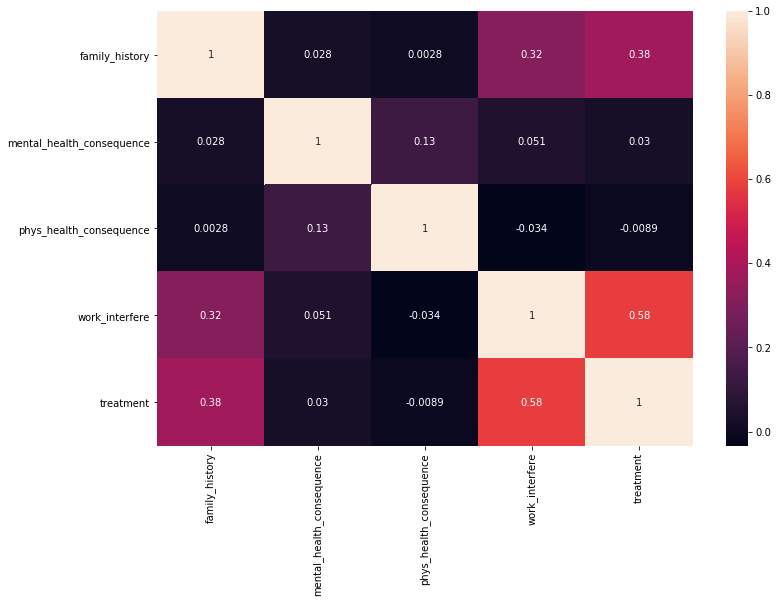

In [116]:
sns.heatmap(prediction.corr(),annot=True) #heatmap

# insight from part 2 analysis and visualisation 
from the heatmap we can see that treatment column is correlated to work_interfere and family_history.so we can say that these to are the strong predicter for mental health issue 

# Analysis part 3
For this analysis i am comparing the data of those who have with treated with mental illness and the reply they have given for question asked in survey with involve work environment like seek help,discussion with supervisor,co-worker,application of leave with refrence to mental health,or any wellness program they have attended from company.

TO know if they have discussed the issue with supervisor.bar chart is used to show the response of patients treated to this question in percentage where 1=100%.

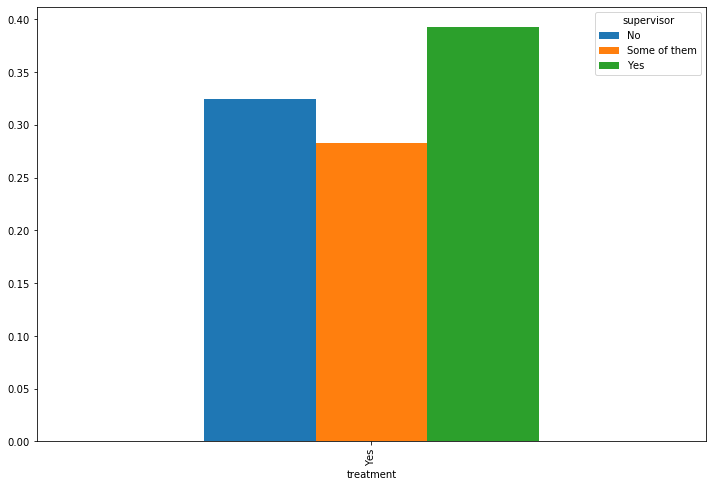

In [117]:
wp=df.filter(["treatment","supervisor"])
wp
wps=wp.loc[wp["treatment"]=='Yes']    #data of only those who have been treated
wps
wps1= pd.crosstab(wps['treatment'],wps['supervisor']).apply(lambda r:r/r.sum(),axis=1)
wps1
wps1.plot(kind='bar',stacked=False)

TO know if they have seek help from others.bar chart is used to show the response of patients treated to this question in percentage where 1 =100%

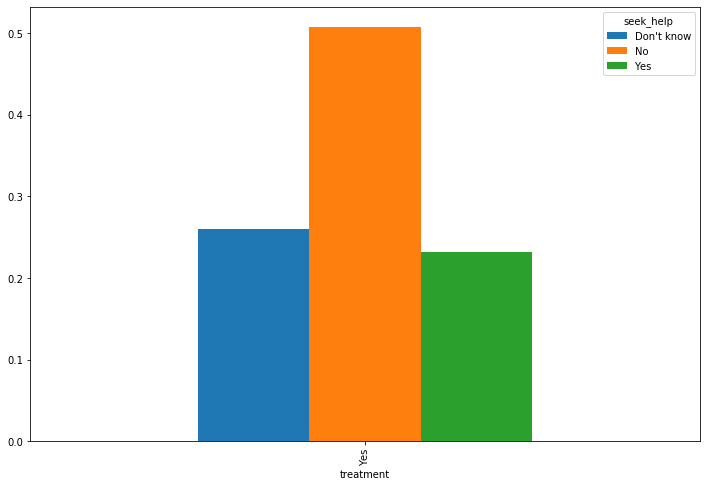

In [118]:
wpseek=df.filter(["treatment","seek_help"])
wpseek
wpseek1=wpseek.loc[wpseek["treatment"]=='Yes'] # data of only those who have been treated
wpseek1
wpseekper= pd.crosstab(wpseek1['treatment'],wpseek1['seek_help']).apply(lambda r:r/r.sum(),axis=1)
wpseekper.plot(kind='bar',stacked=False)

TO know what was response of company to get leave based on mental illness.bar chart is used to show the response of patients treated to this question in percentage where 1=100%.

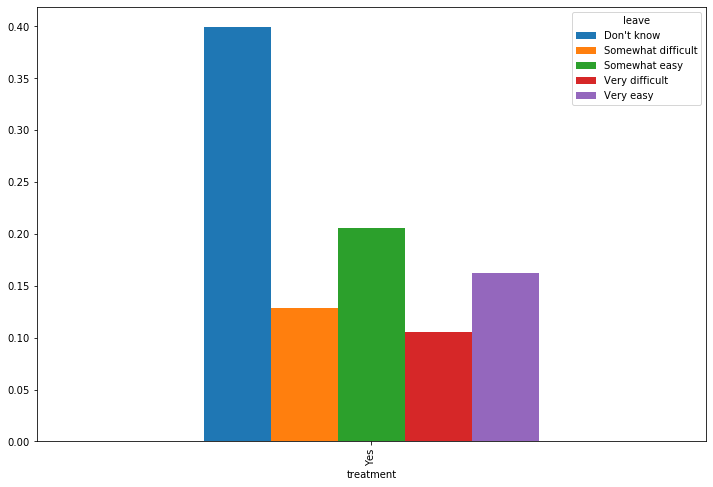

In [119]:
wpleave=df.filter(["treatment","leave"])
wpseek
wpleave1=wpleave.loc[wpleave["treatment"]=='Yes']       #data of only those who have been treated
wpleave1
wpleave2= pd.crosstab(wpleave1['treatment'],wpleave1['leave']).apply(lambda r:r/r.sum(),axis=1)
wpleave2.plot(kind='bar',stacked=False)

TO know if they visited any wellness program conducted by company.bar chart is used to show the response of patients treated to this question

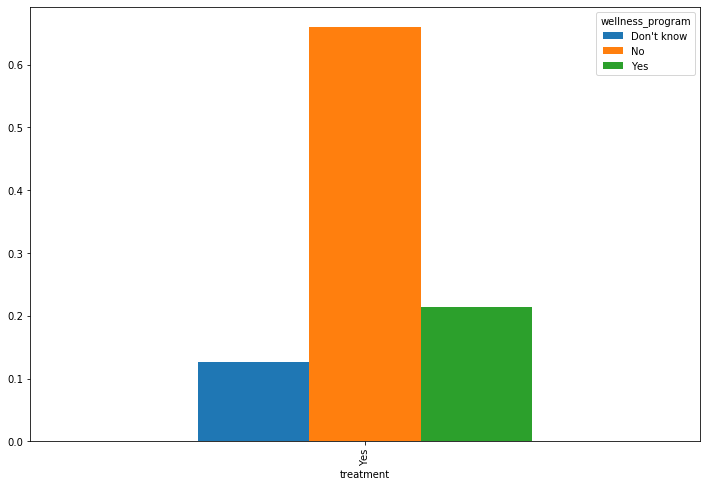

In [120]:
wpwellness=df.filter(["treatment","wellness_program"])
wpwellness
wpwellness1=wpwellness.loc[wpwellness["treatment"]=='Yes'] #collecting data of only those who have been treated 
wpwellness1
wpwellness2= pd.crosstab(wpwellness1['treatment'],wpwellness1['wellness_program']).apply(lambda r:r/r.sum(),axis=1) #for percentage
wpwellness2.plot(kind='bar',stacked=False)

TO know if they have discussed the issue with supervisor.bar chart is used to show the response of patients treated to this question

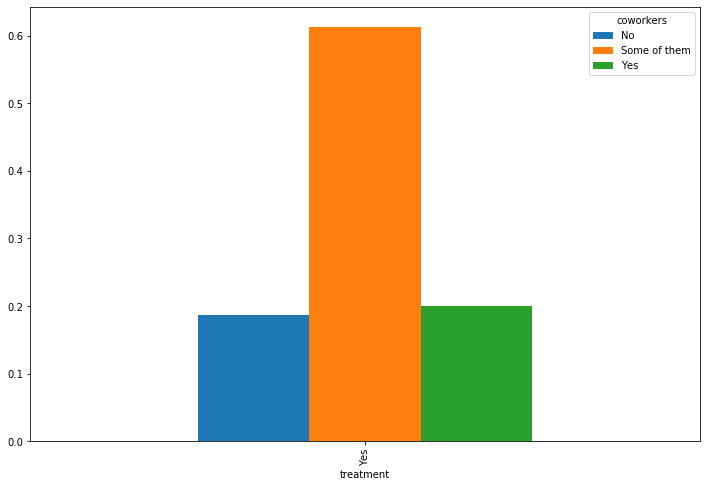

In [121]:
wpcoworkers=df.filter(["treatment","coworkers"])
wpcoworkers
wpcoworkers1=wpcoworkers.loc[wpcoworkers["treatment"]=='Yes'] # collecting data of only those who have been treated
wpcoworkers1
wpcoworkers2= pd.crosstab(wpcoworkers1['treatment'],wpcoworkers1['coworkers']).apply(lambda r:r/r.sum(),axis=1) #for percentage
wpcoworkers2.plot(kind='bar',stacked=False)

# insight from the analysis and visualisation part 3

From the graph we can see that most of them have answer in a negative way which shows that the attitude in workplace is in negative manner .The only response we can see through graph which is positive is that of discussion with supervisor

# Insight from the whole question

from the analysis we can see that the frequency of mental illness is more in usa and uk but they also have positive attitude towards the mental illness.we found that family history and work interference are strong indicator of mental illness,we can say that the attitude in work place is negative.The stakeholder like technology company and industrial comapny can take insight from this analysis and make some policy which wll make the attitude towards mental illness a positive one.stakeholder like clinical psychology therapist and Health adminstration of country can take insight from this analysis and focus on plan which are focused on strong indicater like family history and work interference.